   Periodo 1  Periodo 2  Periodo 3  Periodo 4  Periodo 5
0        0.7       0.54      0.453     0.4045    0.37663
1        0.2       0.30      0.349     0.3723    0.38285
2        0.1       0.15      0.176     0.1902    0.19840
3        0.0       0.01      0.022     0.0330    0.04212
4        0.0       0.00      0.000     0.0000    0.00000


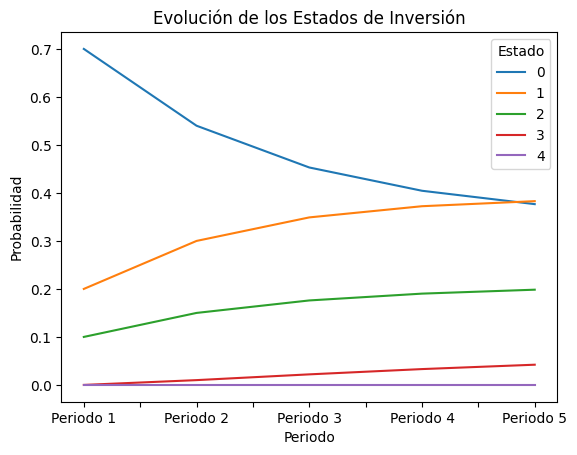

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Probabilidades de transición
p_rp_a_nmm = 0.2  # De "Rendimiento Positivo" a "Rendimiento Negativo Moderado"
p_nmm_a_nma = 0.15  # De "Rendimiento Negativo Moderado" a "Rendimiento Negativo Alto"
p_nmm_a_rp = 0.15   # De "Rendimiento Negativo Moderado" a "Rendimiento Positivo"
p_nma_a_rp = 0.25   # De "Rendimiento Negativo Alto" a "Rendimiento Positivo"
p_nma_a_nma = 0.15  # De "Rendimiento Negativo Alto" a "Rendimiento Negativo Alto" (permanencia)

# Matriz de transición estimada basada en las descripciones cualitativas
matriz_transicion = np.array([
    [0.7, 0.2, 0.1, 0.0, 0.0], # PA
    [0.2, 0.7, 0.1, 0.0, 0.0], # PM
    [0.1, 0.2, 0.6, 0.1, 0.0], # NM
    [0.0, 0.1, 0.2, 0.7, 0.0], # NH
    [0.0, 0.1, 0.2, 0.1, 0.6]  # Fuga
])


vector_estado_inicial = np.array([1, 0, 0, 0, 0])  

n_periodos = 5
estado_actual = vector_estado_inicial
df_estados = pd.DataFrame()

for i in range(n_periodos):
    estado_actual = np.dot(estado_actual, matriz_transicion)
    df_estados[f'Periodo {i+1}'] = estado_actual

print(df_estados)

# Gráfico de la evolución de los estados
df_estados.T.plot()
plt.title('Evolución de los Estados de Inversión')
plt.xlabel('Periodo')
plt.ylabel('Probabilidad')
plt.legend(title='Estado')
plt.show()
